# 1. K-means 

## 1.1. Data

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [18]:
# Import data blob from scikit-learn
from sklearn.datasets import make_blobs

In [19]:
blob_centers = np.array([[ 0.2,  2.3],
                        [-1.5 ,  2.3],
                        [-2.8,  1.8],
                        [-2.8,  2.8],
                        [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [20]:
# X: generated samples (coor in Oxy w (x0, y0))
# y: integer labels for cluster membership of each sample 
X,y = make_blobs(n_samples=500, centers=blob_centers,
                cluster_std=blob_std, random_state=42)
y[:10]

array([3, 3, 2, 0, 2, 3, 4, 4, 2, 2])

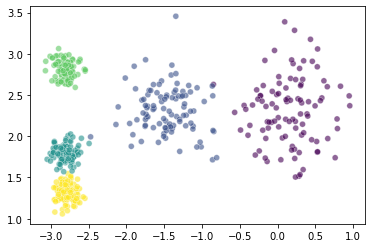

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# color = tuple int -> other cluster has other color 
sns.scatterplot(X[:, 0], X[:, 1], c = y, alpha=0.6);

## 1.2. K-means 

In [22]:
from sklearn.cluster import KMeans

# Init k-cluster
k_init = 5 
kmeans = KMeans(n_clusters=k_init)

In [23]:
# Fit & Predict 
y_pred = kmeans.fit_predict(X)

# First 10 predictor
y_pred[:10]

array([0, 0, 4, 1, 4, 0, 2, 2, 4, 4], dtype=int32)

In [24]:
# Predict new data 
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 0, 0], dtype=int32)

In [25]:
# In the KMeans class, the transform() method measures the distance from each instance to every centroid (from 1,2,3...)
kmeans.transform(X_new)

array([[2.92200001, 0.35103375, 2.87073952, 1.48015431, 2.80912045],
       [5.8637849 , 2.853046  , 5.8279534 , 4.45674098, 5.80503661],
       [0.27076141, 3.23816719, 1.70038749, 1.69716212, 1.22680656],
       [0.36435323, 3.16956658, 1.20593689, 1.56517294, 0.73787522]])

In [26]:
# Score by inertia - mean squared distance between each instance and its closest centroid
print(kmeans.inertia_)

# score() method returns the negative inertia, bcs it always respect the "great is better" rule
print(kmeans.score(X))

49.02812479675544
-49.028124796755435


## 1.3. Mini-batch K-Means

* `Online K-means` help us to cluster big/stream data, follow online learning & SGD (stochastic GD)

* Instead of using the full dataset at each iteration (epoch), the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration.

In [27]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [28]:
# Score
minibatch_kmeans.score(X)

-50.6163017009724

# 2. Applications

## 2.1. Image segmentation